In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

targets=[]
features=[]
files = glob.glob("test/*.jpg")


for file in files:
    features.append(np.array(Image.open(file).resize((100, 100))))
    if "banane" in file: 
        target = [1, 0, 0, 0, 0]
    elif "pomme" in file: 
        target = [0, 1, 0, 0, 0]
    elif "kiwi" in file: 
        target = [0, 0, 1, 0, 0]
    elif "orange" in file: 
        target = [0, 0, 0, 1, 0]
    elif "tomate" in file: 
        target = [0, 0, 0, 0, 1]
    
    targets.append(target)

features = np.array(features)
targets = np.array(targets)

print("Shape features", features.shape)
print("Shape targets", targets.shape)


Shape features (576, 100, 100, 3)
Shape targets (576, 5)


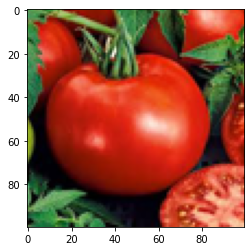

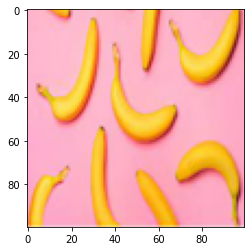

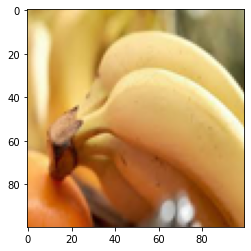

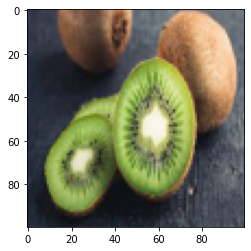

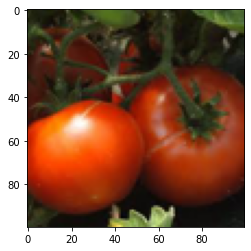

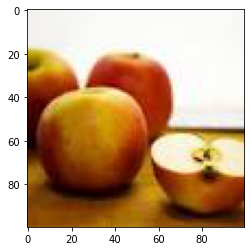

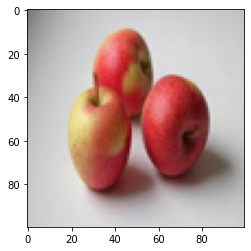

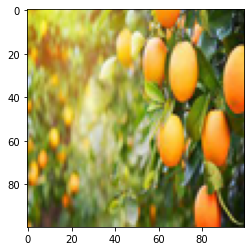

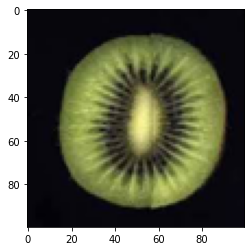

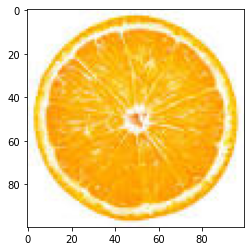

In [2]:
from random import randint
for a in [randint(0, len(targets)) for _ in range(10)]:
    plt.imshow(features[a])
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.1, random_state=42)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (518, 100, 100, 3)
X_test (58, 100, 100, 3)
y_train (518, 5)
y_test (58, 5)


In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



# Placeholder
x = tf.placeholder(tf.float32, (None, 100, 100, 3), name="Image")
y = tf.placeholder(tf.float32, (None, 5),name="Targets")

def create_conv(prev, filter_size, nb):

    W_filters = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, int(prev.get_shape()[-1]), nb)))
    b_filters = tf.Variable(tf.zeros(shape=(nb)))
    conv = tf.nn.conv2d(prev, W_filters, strides=[1,1,1,1], padding="SAME") + b_filters
    conv= tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1,2,2,1], strides=[1,2,2,1],padding="SAME")
    return conv
    
    
#convolution    
conv=create_conv(x,8,16)
conv=create_conv(conv,5,32)
conv=create_conv(conv,5,64)
conv=create_conv(conv,5,64)
conv=create_conv(conv,5,64)
conv=create_conv(conv,5,64)

flat = tf.compat.v1.layers.flatten(conv)

#fully connected layers
w1 = tf.Variable(tf.truncated_normal(shape=(int(flat.get_shape()[1]), 521)))
b1 = tf.Variable(tf.zeros(shape=(521)))
fc1 = tf.matmul(flat, w1) + b1
fc1 = tf.nn.relu(fc1)

#fully connected layers output
w2 = tf.Variable(tf.truncated_normal(shape=(521, 5)))
b2 = tf.Variable(tf.zeros(shape=(5)))
logits = tf.matmul(fc1, w2) + b2
softmax = tf.nn.softmax(logits)
print(logits,y)


Tensor("add_31:0", shape=(?, 5), dtype=float32) Tensor("Targets_3:0", shape=(?, 5), dtype=float32)


In [18]:
#loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

#accuracy
correct_preduction = tf.equal(tf.argmax(softmax, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_preduction, tf.float32))

#optimizer
optimizer = tf.train.AdamOptimizer(0.001)
train_op = optimizer.minimize(loss_operation)



In [22]:
batch_size=10

sess = tf.Session()
sess.run(tf.global_variables_initializer())



In [23]:
for epoch in range (0,10):
    
    index = np.arange(len(X_train))
    np.random.shuffle(index)
    X_train = X_train[index]
    y_train = y_train[index]
    
    for b in range(0,len(X_train),batch_size):
        print("b=%s, %s"%(b, len(X_train)))
        batch = X_train[b : b + batch_size]
        sess.run(train_op, feed_dict={x: batch, y: y_train[b:b+batch_size]})
        
    accs = []
    for b in range(0,len(X_test),batch_size):
        batch = X_test[b:b+batch_size]
        acc = sess.run(accuracy, feed_dict={x: batch, y: y_test[b:b+batch_size]})
        accs.append(acc)
        
    print("mean validation", np.mean(accs))


b=0, 518
b=10, 518
b=20, 518
b=30, 518
b=40, 518
b=50, 518
b=60, 518
b=70, 518
b=80, 518
b=90, 518
b=100, 518
b=110, 518
b=120, 518
b=130, 518
b=140, 518
b=150, 518
b=160, 518
b=170, 518
b=180, 518
b=190, 518
b=200, 518
b=210, 518
b=220, 518
b=230, 518
b=240, 518
b=250, 518
b=260, 518
b=270, 518
b=280, 518
b=290, 518
b=300, 518
b=310, 518
b=320, 518
b=330, 518
b=340, 518
b=350, 518
b=360, 518
b=370, 518
b=380, 518
b=390, 518
b=400, 518
b=410, 518
b=420, 518
b=430, 518
b=440, 518
b=450, 518
b=460, 518
b=470, 518
b=480, 518
b=490, 518
b=500, 518
b=510, 518
mean validation 0.36250004
b=0, 518
b=10, 518
b=20, 518
b=30, 518
b=40, 518
b=50, 518
b=60, 518
b=70, 518
b=80, 518
b=90, 518
b=100, 518
b=110, 518
b=120, 518
b=130, 518
b=140, 518
b=150, 518
b=160, 518
b=170, 518
b=180, 518
b=190, 518
b=200, 518
b=210, 518
b=220, 518
b=230, 518
b=240, 518
b=250, 518
b=260, 518
b=270, 518
b=280, 518
b=290, 518
b=300, 518
b=310, 518
b=320, 518
b=330, 518
b=340, 518
b=350, 518
b=360, 518
b=370, 518
b=380